In [3]:
import os
import tarfile
import urllib

In [4]:
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

In [3]:
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [4]:
fetch_housing_data()

In [5]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [6]:
housing = load_housing_data()

In [7]:
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [8]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [264]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'income_cat'],
      dtype='object')

In [250]:
import plotly
import plotly.express as px

In [251]:
plotly.offline.init_notebook_mode(connected=True)

In [13]:
import matplotlib.pyplot as plt
import numpy as np

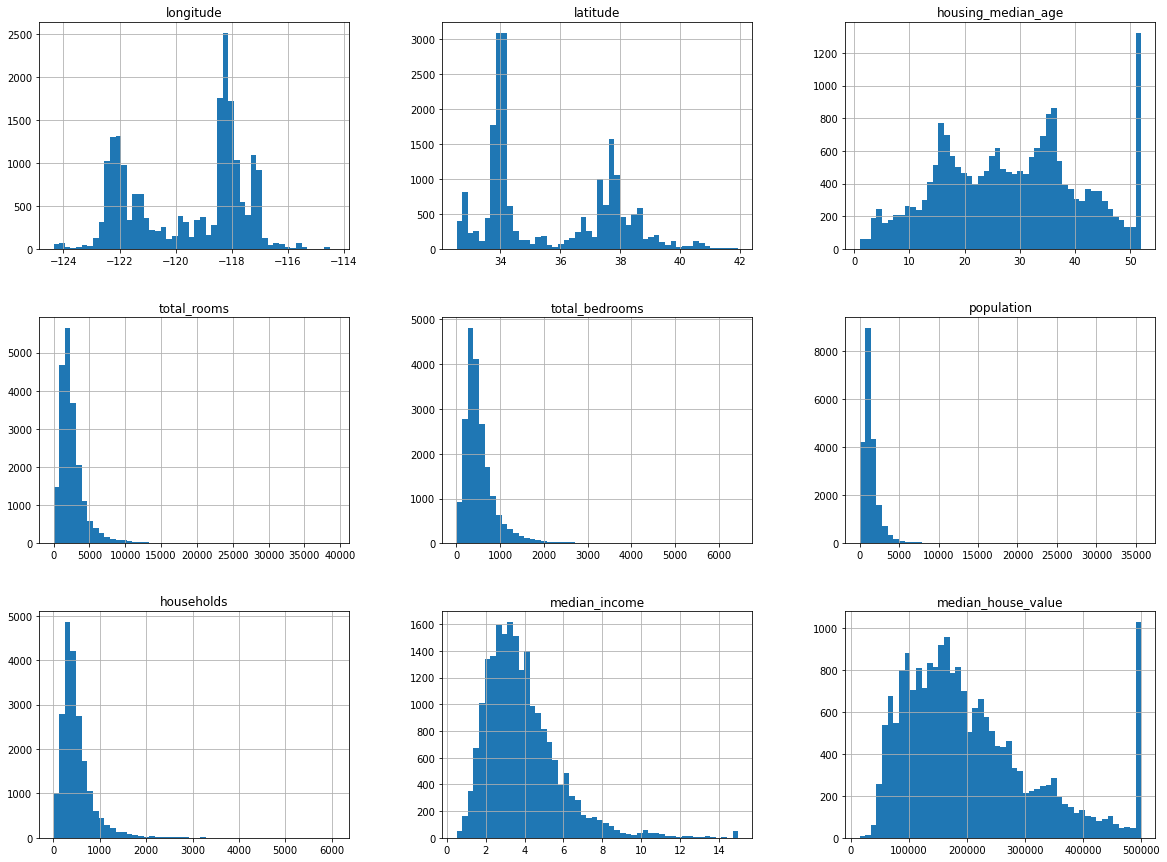

In [14]:
housing.hist(bins=50, figsize=(20,15))
plt.show()

In [253]:
housing['income_cat'] = pd.cut(
    housing['median_income'],
    bins = [0, 1.5, 3, 4.5, 6, np.inf],
    labels = [1,2,3,4,5]
)

In [254]:
px.histogram(housing,x='income_cat',)

In [17]:
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split

In [18]:

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
train_indexes, test_indexes = list(split.split(housing, housing['income_cat']))[0]


In [19]:
strat_train_set = housing.loc[train_indexes]
strat_test_set = housing.loc[test_indexes]

In [20]:
strat_test_set['income_cat'].value_counts() / len(test_indexes)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [21]:
strat_train_set.drop(columns=['income_cat'], axis=1, inplace=True)
strat_test_set.drop(columns=['income_cat'], axis=1, inplace=True)

In [22]:
px.scatter_mapbox(strat_train_set,lat="latitude", lon="longitude", color= "median_house_value", size="population",
                 color_continuous_scale=px.colors.cyclical.IceFire,size_max=15,zoom=10,mapbox_style="carto-positron")

In [23]:
strat_train_set.corr()['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

In [24]:
px.scatter_matrix(strat_train_set[['median_house_value','median_income','total_rooms','housing_median_age']])

In [25]:
px.scatter(strat_train_set, y="median_house_value", x="median_income")

In [26]:
strat_train_set.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [27]:
strat_train_set['rooms_per_household'] = strat_train_set['total_rooms'] / strat_train_set['households']

In [28]:
strat_train_set['bedrooms_per_room'] = strat_train_set['total_bedrooms'] / strat_train_set['total_rooms']

In [29]:
strat_train_set['population_per_household'] = strat_train_set['population'] / strat_train_set['households']

In [30]:
strat_train_set.corr()['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

# DATA CLEANING

In [31]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
train_indexes, test_indexes = list(split.split(housing, housing['income_cat']))[0]
strat_train_set = housing.loc[train_indexes]
strat_test_set = housing.loc[test_indexes]
strat_train_set.drop(columns=['income_cat'], axis=1, inplace=True)
strat_test_set.drop(columns=['income_cat'], axis=1, inplace=True)

In [32]:
housing = strat_train_set.drop(columns=['median_house_value'], axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [33]:
from sklearn.impute import SimpleImputer

In [34]:
imputer = SimpleImputer(strategy="median")

In [35]:
housing_num = housing.drop(columns = ["ocean_proximity"])

In [36]:
imputer.fit(housing_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [37]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [38]:
X = imputer.transform(housing_num)

In [39]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)

In [40]:
housing_tr.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
17606    -121.89     37.29                38.0       1568.0           351.0   
18632    -121.93     37.05                14.0        679.0           108.0   
14650    -117.20     32.77                31.0       1952.0           471.0   
3230     -119.61     36.31                25.0       1847.0           371.0   
3555     -118.59     34.23                17.0       6592.0          1525.0   

       population  households  median_income  
17606       710.0       339.0         2.7042  
18632       306.0       113.0         6.4214  
14650       936.0       462.0         2.8621  
3230       1460.0       353.0         1.8839  
3555       4459.0      1463.0         3.0347

In [41]:
housing_cat = housing[["ocean_proximity"]]

In [42]:
housing_cat

ocean_proximity
17606       <1H OCEAN
18632       <1H OCEAN
14650      NEAR OCEAN
3230           INLAND
3555        <1H OCEAN
...               ...
6563           INLAND
12053          INLAND
13908          INLAND
11159       <1H OCEAN
15775        NEAR BAY

[16512 rows x 1 columns]

In [43]:
from sklearn.preprocessing import OrdinalEncoder

In [44]:
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [45]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [46]:
from sklearn.preprocessing import OneHotEncoder

In [47]:
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [48]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [49]:
from sklearn.base import BaseEstimator,TransformerMixin

In [50]:
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6 

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [51]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [52]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [53]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])

In [54]:
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [55]:
from sklearn.compose import ColumnTransformer

In [56]:
num_attribs = list(housing_num.columns)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs)
])

In [57]:
housing_prepared = full_pipeline.fit_transform(housing)

In [58]:
housing_prepared[0]

array([-1.15604281,  0.77194962,  0.74333089, -0.49323393, -0.44543821,
       -0.63621141, -0.42069842, -0.61493744, -0.31205452, -0.08649871,
        0.15531753,  1.        ,  0.        ,  0.        ,  0.        ,
        0.        ])

In [59]:
housing_labels.values

array([286600., 340600., 196900., ...,  97800., 225900., 500001.])

# Model Training

In [60]:
from sklearn.linear_model import LinearRegression

In [61]:
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels.values)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [62]:
housing_test = strat_test_set.drop(columns=['median_house_value'])
housing_test_labels = strat_test_set['median_house_value']

In [63]:
housing_test_prepared = full_pipeline.fit_transform(housing_test)

In [64]:
pred = lin_reg.predict(housing_test_prepared)

In [65]:
pd.DataFrame(list(zip(pred, housing_test_labels.values)), columns=['prediction', 'original'])

prediction  original
0     425796.104957  500001.0
1     265756.954638  240300.0
2     225467.839461  218200.0
3     204772.991494  182100.0
4     167210.406049  121300.0
...             ...       ...
4123  121437.285779   76400.0
4124  196210.686791  134000.0
4125  288581.367611  311700.0
4126  193928.331833  133500.0
4127  168231.692993   78600.0

[4128 rows x 2 columns]

In [66]:
from sklearn.metrics import mean_squared_error

In [67]:
pred = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(pred, housing_labels.values)

In [68]:
lin_rmse = np.sqrt(lin_mse)

In [69]:
lin_rmse

68628.19819848922

In [70]:
from sklearn.tree import DecisionTreeRegressor

In [71]:
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [72]:
pred = tree_reg.predict(housing_prepared)

In [73]:
tree_mse = mean_squared_error(housing_labels, pred)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

In [74]:
from sklearn.model_selection import cross_val_score

In [77]:
scores = cross_val_score(
    tree_reg,
    housing_prepared,
    housing_labels,
    scoring="neg_mean_squared_error",
    cv=10
)

In [78]:
tree_rmse_scores = np.sqrt(-scores)

In [79]:
def display(scores):
    print("Scores : ", scores)
    print("Mean : ", scores.mean())
    print("Standard deviaation : ", scores.std())

In [80]:
display(tree_rmse_scores)

Scores :  [69070.315787   66169.14810408 69695.67768856 68774.31395692
 71783.40621646 74888.93235574 72590.46327426 70912.66470829
 77231.72876143 68596.73590914]
Mean :  70971.33867618728
Standard deviaation :  3107.931373690125


In [81]:
scores = cross_val_score(
    lin_reg,
    housing_prepared,
    housing_labels,
    scoring="neg_mean_squared_error",
    cv=10
)
lin_rmse_scores = np.sqrt(-scores)
display(lin_rmse_scores)

Scores :  [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean :  69052.46136345083
Standard deviaation :  2731.674001798347


In [82]:
from sklearn.ensemble import RandomForestRegressor

In [83]:
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [84]:
scores = cross_val_score(
    forest_reg,
    housing_prepared,
    housing_labels,
    scoring="neg_mean_squared_error",
    cv=10
)
forest_rmse_scores = np.sqrt(-scores)
display(forest_rmse_scores)

Scores :  [49475.46895169 47674.24528978 49904.6433749  52379.62625212
 49713.23796483 53586.55831519 48776.12411391 47777.45593891
 52726.32663965 50034.893048  ]
Mean :  50204.857988896736
Standard deviaation :  1943.0284504946385


In [85]:
pred = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, pred)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18714.618869557355

In [86]:
from sklearn.model_selection import GridSearchCV

In [87]:
param_grid = [
    {"n_estimators": [3,10,30], "max_features": [2,4,6,8]},
    {"bootstrap": [False], "n_estimators": [3,10], "max_features": [2,3,4]}
]

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, 
                           scoring = "neg_mean_squared_error", return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [88]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [89]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=8, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [91]:
cvres = grid_search.cv_results_

In [92]:
for mean_score,params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

64962.26483371792 {'max_features': 2, 'n_estimators': 3}
55262.20175868651 {'max_features': 2, 'n_estimators': 10}
53047.15698866118 {'max_features': 2, 'n_estimators': 30}
60287.38567011671 {'max_features': 4, 'n_estimators': 3}
52785.06488419416 {'max_features': 4, 'n_estimators': 10}
50408.50349961586 {'max_features': 4, 'n_estimators': 30}
58963.31366225558 {'max_features': 6, 'n_estimators': 3}
52164.90649650887 {'max_features': 6, 'n_estimators': 10}
50019.69550414312 {'max_features': 6, 'n_estimators': 30}
58742.89066190846 {'max_features': 8, 'n_estimators': 3}
52275.25698697064 {'max_features': 8, 'n_estimators': 10}
49991.496888129026 {'max_features': 8, 'n_estimators': 30}
62369.35381412248 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54441.27672475144 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59711.461130545 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52307.49528627598 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}

In [93]:
feature_importances = grid_search.best_estimator_.feature_importances_
extra_attribs = ["rooms_per_household", "population_per_household", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_['cat']
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.3853973986128436, 'median_income'),
 (0.15506393494478754, 'INLAND'),
 (0.1111744782688549, 'population_per_household'),
 (0.06859440238752348, 'longitude'),
 (0.06436606840409935, 'latitude'),
 (0.05321365562644867, 'bedrooms_per_room'),
 (0.05047580368734132, 'rooms_per_household'),
 (0.041681992042081326, 'housing_median_age'),
 (0.016342203215654896, 'total_rooms'),
 (0.015647671237260283, 'population'),
 (0.014944350889132896, 'total_bedrooms'),
 (0.01410376972198123, 'households'),
 (0.004072021204096402, '<1H OCEAN'),
 (0.002973905787228811, 'NEAR OCEAN'),
 (0.0018909744475997005, 'NEAR BAY'),
 (5.7369523065662594e-05, 'ISLAND')]

In [94]:
X_test = strat_test_set.drop(columns=['median_house_value'])
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)

In [95]:
final_model = grid_search.best_estimator_

final_pred = final_model.predict(X_test_prepared)

In [96]:
final_mse = mean_squared_error(y_test,final_pred)
final_rmse = np.sqrt(final_mse)
final_rmse

68840.18824444182

In [97]:
from sklearn.svm import SVR

In [223]:
svr = SVR(
    kernel = 'linear',
    C = 5000
)

In [224]:
svr.fit(housing_prepared, housing_labels)

SVR(C=5000, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [225]:
pred = svr.predict(housing_prepared)
svr_mse = mean_squared_error(housing_labels, pred)
svr_rmse = np.sqrt(svr_mse)
svr_rmse

70189.14092512034

In [226]:
scores = cross_val_score(
    svr,
    housing_prepared,
    housing_labels,
    scoring="neg_mean_squared_error",
    cv=10
)

svr_rmse_scores = np.sqrt(-scores)
display(svr_rmse_scores)

Scores :  [67425.7823932  68008.45235523 73013.93524171 74628.47196547
 69121.86039651 73095.28701026 66298.37662481 69817.80785651
 72035.38826034 69689.02625166]
Mean :  70313.43883557005
Standard deviaation :  2616.173314576483


In [124]:
from sklearn.model_selection import RandomizedSearchCV

In [125]:
param_grid = [
    {"n_estimators": [3,10,30], "max_features": [2,4,6,8]},
    {"bootstrap": [False], "n_estimators": [3,10], "max_features": [2,3,4]}
]

forest_reg = RandomForestRegressor()
random_search = RandomizedSearchCV(forest_reg, param_grid, cv=5, 
                           scoring = "neg_mean_squared_error", return_train_score=True)
random_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [126]:
random_search.best_params_

{'n_estimators': 30, 'max_features': 4}

In [127]:
cvres = random_search.cv_results_
for mean_score,params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

60330.573976471926 {'n_estimators': 3, 'max_features': 3, 'bootstrap': False}
52122.86947060927 {'n_estimators': 10, 'max_features': 8}
52972.291215163255 {'n_estimators': 30, 'max_features': 2}
64738.478568053404 {'n_estimators': 3, 'max_features': 2}
60026.394995775474 {'n_estimators': 3, 'max_features': 4}
62411.980689629876 {'n_estimators': 3, 'max_features': 2, 'bootstrap': False}
52493.635523455756 {'n_estimators': 10, 'max_features': 6}
59154.53385760089 {'n_estimators': 3, 'max_features': 6}
52687.26872137724 {'n_estimators': 10, 'max_features': 3, 'bootstrap': False}
50231.2007434166 {'n_estimators': 30, 'max_features': 4}


In [136]:
np.argpartition(np.array(feature_importances), -5)[:-5]

array([15, 13, 14, 11,  6,  4,  5,  3,  2,  8, 10], dtype=int64)

In [135]:
feature_importances

array([6.85944024e-02, 6.43660684e-02, 4.16819920e-02, 1.63422032e-02,
       1.49443509e-02, 1.56476712e-02, 1.41037697e-02, 3.85397399e-01,
       5.04758037e-02, 1.11174478e-01, 5.32136556e-02, 4.07202120e-03,
       1.55063935e-01, 5.73695231e-05, 1.89097445e-03, 2.97390579e-03])

In [199]:
def get_top_k_indices(feature_importances, k):
    return np.sort(np.argpartition(np.array(feature_importances), -k)[-k:])

class TopFeatureSelector(BaseEstimator, TransformerMixin):
    
    def __init__(self, feature_importances, k):
        self.feature_importances = feature_importances
        self.k = k
        
    def fit(self, X, y=None):
        self.feature_indices_ = get_top_k_indices(self.feature_importances, self.k)
        return self
    
    def transform(self, X):
        return X[:, self.feature_indices_]

In [201]:
k=2
np.argpartition(np.array(feature_importances), -k)[-k:]

array([12,  7], dtype=int64)

In [185]:
top_feature_selector = TopFeatureSelector(feature_importances, 5)

In [186]:
housing_top_features_prepared = top_feature_selector.fit_transform(housing_prepared)

In [229]:
k=8

prepare_select_and_predict_pipeline = Pipeline([
    ('preparation', full_pipeline),
    ('feature_selection', TopFeatureSelector(feature_importances, k)),
    ('forest_reg',RandomForestRegressor(**grid_search.best_params_))
])

In [230]:
prepare_select_and_predict_pipeline.fit(housing, housing_labels)

Pipeline(memory=None,
         steps=[('preparation',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                              

In [232]:
pred = prepare_select_and_predict_pipeline.predict(housing)
final_mse = mean_squared_error(housing_labels, pred)
final_rmse = np.sqrt(final_mse)
final_rmse

19548.931259132394

In [233]:
X_test = strat_test_set.drop(columns=['median_house_value'])
y_test = strat_test_set["median_house_value"].copy()
pred = prepare_select_and_predict_pipeline.predict(X_test)
final_mse = mean_squared_error(y_test, pred)
final_rmse = np.sqrt(final_mse)
final_rmse

48360.91698703887

In [234]:
param_grid = [{
    'preparation__num__imputer__strategy': ['mean', 'median', 'most_frequent'],
    'feature_selection__k': list(range(8, len(feature_importances) + 1))
}]
grid_search_prep = GridSearchCV(prepare_select_and_predict_pipeline, param_grid, cv=5,
                                scoring='neg_mean_squared_error', verbose=2)
grid_search_prep.fit(housing, housing_labels)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] feature_selection__k=8, preparation__num__imputer__strategy=mean 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  feature_selection__k=8, preparation__num__imputer__strategy=mean, total=   2.1s
[CV] feature_selection__k=8, preparation__num__imputer__strategy=mean 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


[CV]  feature_selection__k=8, preparation__num__imputer__strategy=mean, total=   2.1s
[CV] feature_selection__k=8, preparation__num__imputer__strategy=mean 
[CV]  feature_selection__k=8, preparation__num__imputer__strategy=mean, total=   3.3s
[CV] feature_selection__k=8, preparation__num__imputer__strategy=mean 
[CV]  feature_selection__k=8, preparation__num__imputer__strategy=mean, total=   2.7s
[CV] feature_selection__k=8, preparation__num__imputer__strategy=mean 
[CV]  feature_selection__k=8, preparation__num__imputer__strategy=mean, total=   2.6s
[CV] feature_selection__k=8, preparation__num__imputer__strategy=median 
[CV]  feature_selection__k=8, preparation__num__imputer__strategy=median, total=   2.8s
[CV] feature_selection__k=8, preparation__num__imputer__strategy=median 
[CV]  feature_selection__k=8, preparation__num__imputer__strategy=median, total=   2.9s
[CV] feature_selection__k=8, preparation__num__imputer__strategy=median 
[CV]  feature_selection__k=8, preparation__num__

[CV]  feature_selection__k=11, preparation__num__imputer__strategy=median, total=   2.9s
[CV] feature_selection__k=11, preparation__num__imputer__strategy=median 
[CV]  feature_selection__k=11, preparation__num__imputer__strategy=median, total=   3.0s
[CV] feature_selection__k=11, preparation__num__imputer__strategy=median 
[CV]  feature_selection__k=11, preparation__num__imputer__strategy=median, total=   2.8s
[CV] feature_selection__k=11, preparation__num__imputer__strategy=median 
[CV]  feature_selection__k=11, preparation__num__imputer__strategy=median, total=   2.7s
[CV] feature_selection__k=11, preparation__num__imputer__strategy=most_frequent 
[CV]  feature_selection__k=11, preparation__num__imputer__strategy=most_frequent, total=   2.7s
[CV] feature_selection__k=11, preparation__num__imputer__strategy=most_frequent 
[CV]  feature_selection__k=11, preparation__num__imputer__strategy=most_frequent, total=   3.1s
[CV] feature_selection__k=11, preparation__num__imputer__strategy=mo

[CV]  feature_selection__k=14, preparation__num__imputer__strategy=most_frequent, total=   2.6s
[CV] feature_selection__k=14, preparation__num__imputer__strategy=most_frequent 
[CV]  feature_selection__k=14, preparation__num__imputer__strategy=most_frequent, total=   2.7s
[CV] feature_selection__k=14, preparation__num__imputer__strategy=most_frequent 
[CV]  feature_selection__k=14, preparation__num__imputer__strategy=most_frequent, total=   2.8s
[CV] feature_selection__k=14, preparation__num__imputer__strategy=most_frequent 
[CV]  feature_selection__k=14, preparation__num__imputer__strategy=most_frequent, total=   2.5s
[CV] feature_selection__k=15, preparation__num__imputer__strategy=mean 
[CV]  feature_selection__k=15, preparation__num__imputer__strategy=mean, total=   2.4s
[CV] feature_selection__k=15, preparation__num__imputer__strategy=mean 
[CV]  feature_selection__k=15, preparation__num__imputer__strategy=mean, total=   2.5s
[CV] feature_selection__k=15, preparation__num__imputer

[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:  6.2min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preparation',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='drop',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('num',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('imputer',
                                                                                          SimpleImputer(add_indicator=False,
                                                                                                        copy=True,
                                     

In [235]:
grid_search_prep.best_params_

{'feature_selection__k': 16, 'preparation__num__imputer__strategy': 'mean'}

In [236]:
final_model = grid_search_prep.best_estimator_

In [237]:
pred = final_model.predict(housing)
final_mse = mean_squared_error(housing_labels, pred)
final_rmse = np.sqrt(final_mse)
final_rmse

19323.64463174749

In [238]:
X_test = strat_test_set.drop(columns=['median_house_value'])
y_test = strat_test_set["median_house_value"].copy()
pred = final_model.predict(X_test)
final_mse = mean_squared_error(y_test, pred)
final_rmse = np.sqrt(final_mse)
final_rmse

47232.459804667174

In [240]:
df = pd.DataFrame(zip(y_test,pred),columns=['true', 'pred'])

In [260]:
px.line(df[:100],y=['true','pred'])

In [261]:
import joblib

In [263]:
joblib.dump(final_model, "calfornia_housing.pkl")

['calfornia_housing.pkl']

In [283]:
one = X_test.iloc[[0]]

In [284]:
pred = final_model.predict(one)

In [288]:
X_test['longitude'].iloc[0]

-118.39

In [297]:
columns = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
                   'total_bedrooms', 'population', 'households', 'median_income',
                   'ocean_proximity']
values = dict()
for col in columns:
    values[col] = [X_test[col].iloc[0]]

In [299]:
df = pd.DataFrame.from_dict(values)

In [300]:
pred = final_model.predict(df)

In [302]:
pred[0]

494874.23333333334

In [304]:
df

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -118.39     34.12                29.0       6447.0          1012.0   

   population  households  median_income ocean_proximity  
0      2184.0       960.0         8.2816       <1H OCEAN

In [305]:
float("12")

12.0

In [306]:
X_test['ocean_proximity'].unique()

array(['<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'NEAR BAY', 'ISLAND'],
      dtype=object)